In [4]:
#### Standard Libraries #####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

##### For Preprocessing #####
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

##### For Building the Model #####
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import make_pipeline

##### For Validation of the Model #####
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

# Load dataset

In [3]:
data = pd.read_csv("data/Advertising.csv")
data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# Normalize dataset

In [6]:
copy_of_data= data[data.columns]
data_std = copy_of_data.std()
data_mean = copy_of_data.mean()
data[data.columns] = (copy_of_data-data_mean)/data_std 
data

,TV,radio,newspaper,sales
0,0.967425,0.979066,1.774493,1.548168
1,-1.194379,1.080097,0.667903,-0.694304
2,-1.512360,1.524637,1.779084,-0.905135
3,0.051919,1.214806,1.283185,0.858177
4,0.393196,-0.839507,1.278593,-0.215143
...,...,...,...,...
195,-1.267759,-1.317724,-0.769287,-1.230964
196,-0.615491,-1.236899,-1.031011,-0.828469
197,0.348934,-0.940539,-1.109069,-0.234310
198,1.590574,1.261955,1.636743,2.199827


# Add a column with 1 as values

In [7]:
data.insert(0, "Bias", 1)
data

,Bias,TV,radio,newspaper,sales
0,1,0.967425,0.979066,1.774493,1.548168
1,1,-1.194379,1.080097,0.667903,-0.694304
2,1,-1.512360,1.524637,1.779084,-0.905135
3,1,0.051919,1.214806,1.283185,0.858177
4,1,0.393196,-0.839507,1.278593,-0.215143
...,...,...,...,...,...
195,1,-1.267759,-1.317724,-0.769287,-1.230964
196,1,-0.615491,-1.236899,-1.031011,-0.828469
197,1,0.348934,-0.940539,-1.109069,-0.234310
198,1,1.590574,1.261955,1.636743,2.199827


# Divide the dataset into training and testing, with 0.85 and 0.15 ratio, respectively.

In [8]:
x=data.drop(columns=['sales'])
y=data['sales']
print(f"==x (predictors)==\nSize: {x.shape}\n{x.head()}")
print(f"\n==y (target)==\nSize: {y.shape}\n{y.head()}")

==x (predictors)==
Size: (200, 4)
   Bias        TV     radio  newspaper
0     1  0.967425  0.979066   1.774493
1     1 -1.194379  1.080097   0.667903
2     1 -1.512360  1.524637   1.779084
3     1  0.051919  1.214806   1.283185
4     1  0.393196 -0.839507   1.278593

==y (target)==
Size: (200,)
0    1.548168
1   -0.694304
2   -0.905135
3    0.858177
4   -0.215143
Name: sales, dtype: float64


In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [10]:
print("x_train size:", x_train.shape)
print("y_train size:", y_train.shape)
print("\nx_test size:", x_test.shape)
print("y_test size:", y_test.shape)

x_train size: (170, 4)
y_train size: (170,)

x_test size: (30, 4)
y_test size: (30,)


# Fit the model on the training set. 

In [11]:
#initialize weights
def initialize_weights():
    init_w = np.array([0.0, 0.0, 0.0, 0.0])
    return init_w

In [12]:
#predicted values function
def predict(x, weights): 
    return np.dot(x, weights)

In [13]:
#cost function
#y is the actual y value
#y_hat is the predicted y value
def compute_cost(y,y_hat):
    y_shape = y.shape[0]
    square = np.square(y_hat-y)
    cost = np.sum(square)/(2*y_shape)
    return cost

In [14]:
#compute gradient function

def compute_gradient(x,y,y_hat,a):
    y_shape = y.shape[0]
    dot_product = np.dot(x.T,y_hat-y) 
    grad_res = a*dot_product/y_shape
    return grad_res

In [15]:
#update weights function
def update_weights(weights, gradient):
    return weights-gradient

In [16]:
#function for gradient descent
#a default value for later use
def grad_descent(x, y, iteration, weights, a=0.01):
    i=0
    list_of_cost = []
    list_of_weight = []
    while i < iteration:
        y_hat = predict(x, weights)
        costs = compute_cost(y,y_hat)
        list_of_cost.append(costs)
        gradient = compute_gradient(x, y, y_hat, a)
        weights = update_weights(weights,gradient)
        list_of_weight.append(weights)
        i += 1
    return list_of_cost, list_of_weight

In [17]:
#plot cost function

def plot_cost(cost):
    plt.title("Plot for Cost")
    plt.ylabel("Cost")
    plt.xlabel("Number of iteration")
    plt.plot(cost)
    plt.show()

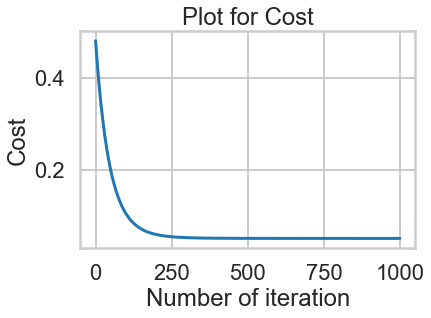

In [18]:
train_weights = initialize_weights()
cost_of_train, actual_weights = grad_descent(x_train, y_train, 1000, train_weights)
plot_cost(cost_of_train)

In [21]:
#predict y for train set
predicted_y_train = predict(x_train, actual_weights[-1])
y_train_cost = compute_cost(y_train, predicted_y_train)
print(y_train_cost)

0.051079827865479245


In [23]:
#predict y for test set
predicted_y_test = predict(x_test, actual_weights[-1])
y_test_cost = compute_cost(y_test, predicted_y_test)
print(y_test_cost)

0.05244864926571236


# Revert to dataset from standardized form

In [24]:
copy_of_data = data.drop(columns=['Bias'])
data[data.columns[1:]] = data_mean + (copy_of_data * data_std)

data

,Bias,TV,radio,newspaper,sales
0,1,0.967425,0.979066,1.774493,1.548168
1,1,-1.194379,1.080097,0.667903,-0.694304
2,1,-1.512360,1.524637,1.779084,-0.905135
3,1,0.051919,1.214806,1.283185,0.858177
4,1,0.393196,-0.839507,1.278593,-0.215143
...,...,...,...,...,...
195,1,-1.267759,-1.317724,-0.769287,-1.230964
196,1,-0.615491,-1.236899,-1.031011,-0.828469
197,1,0.348934,-0.940539,-1.109069,-0.234310
198,1,1.590574,1.261955,1.636743,2.199827


# Divide dataset into testing and training

In [25]:
original_x_data = data.drop(columns=['sales'])
original_y_data = data['sales']

# Cost results

In [30]:
predicted_y = predict(original_x_data,actual_weights[-1])
original_data_cost = compute_cost(predicted_y, original_y_data)
original_data_cost

0.05128515107551419

It is noticeable that the cost we got for the initial data set is not that high compared to the cost we got from our prediction. This only indicates that there is a little difference between the actual and predicted values, hence the calculated weights that were used in the model is good or fit to be used in predicting the sales value.

In [563]:
#--------------------------------------------------------------------------------------------------------------------------

# Solution to the Questions

### 1. What are the optimal weights found by your implemented gradient descent? Plug it into the linear model: ℎ! (𝑥) = 𝜃0 + 𝜃1 𝑇𝑉 + 𝜃2𝑅𝑎𝑑𝑖𝑜 + 𝜃3𝑁𝑒𝑤𝑠𝑝𝑎𝑝𝑒𝑟 What are your interpretations regarding the formed linear model?

In [31]:
#I used the function initialized weights since they return the np.array([0.0, 0.0, 0.0, 0.0]). 
#We use 5000 iterations because 50000 takes too long to load.
weights = initialize_weights()
cost_of_train, actual_weights = grad_descent(x_train, y_train, 5000, weights)
actual_weights[-1]

array([4.35589486e-04, 7.37383146e-01, 5.36307180e-01, 3.14254020e-03])

Base on the result array above, we'll have:
𝜃0 = 4.35589486e-04 
𝜃1 = 7.37383146e-01 
𝜃2 = 5.36307180e-01
𝜃3 = 3.14254020e-03

The linear model is: ℎ𝜃(𝑥) = 4.35589486e-04 + 7.37383146e-01 * 𝑇𝑉 + 5.36307180e-01 * 𝑅𝑎𝑑𝑖𝑜 + 3.14254020e-03 * 𝑁𝑒𝑤𝑠𝑝𝑎𝑝𝑒𝑟

Looking at the linear model, we can observe that the TV is the greatest predictor compared to Radio and Newspaper. Next to TV is Radio then followed by Newspaper.

### 2. Provide a scatter plot of the y_hat(i) and y(i) for both the train and test set. Is there a trend? Provide an r2 score (also available in sklearn)

The R2 score using train set is: 0.8936793584593188


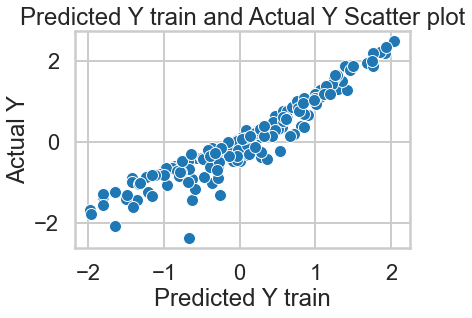

In [32]:
new_predicted_y_train = predict(x_train, actual_weights[-1])
plt.title("Predicted Y train and Actual Y Scatter plot")
plt.xlabel("Predicted Y train")
plt.ylabel("Actual Y")
sns.scatterplot(x=new_predicted_y_train, y=y_train)
r2_train = r2_score(y_train, new_predicted_y_train)
print("The R2 score using train set is:", r2_train)

The R2 score using test set is: 0.911027570209169


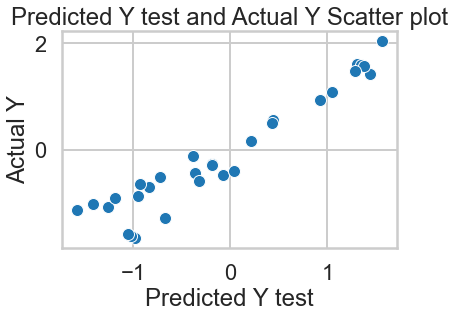

In [33]:
new_predicted_y_test = predict(x_test, actual_weights[-1])

plt.title("Predicted Y test and Actual Y Scatter plot")
plt.xlabel("Predicted Y test")
plt.ylabel("Actual Y")
sns.scatterplot(x=new_predicted_y_test, y=y_test)
r2_train = r2_score(y_test, new_predicted_y_test)
print("The R2 score using test set is:", r2_train)

### 3. What happens to the error, r2, and cost as the number of iterations increase? Show your data and proof. You can alternatively plot your result data for visualization and check until 50000 iterations or more (actually).

Getting the r2, cost and error for each iterations (500, 1000, 10000) and analyze.

In [37]:
weights = initialize_weights()
cost_of_train_3, actual_weights_3 = grad_descent(x_train, y_train, 50000, weights)

In [38]:
#500 iterations
predicted_y_500 = predict(x, actual_weights_3[499])
r2_score_500 = r2_score(y, predicted_y_500)
MAE_500 = mean_absolute_error(y, predicted_y_500)
print("The Cost for 500 iteration is: ", cost_of_train_3[499])
print("The r2 score for 500 iteration is :", r2_score_500)
print("The MAE for 500 iteration is :", MAE_500)

The Cost for 500 iteration is:  0.05118539064304033
The r2 score for 500 iteration is : 0.896415695070808
The MAE for 500 iteration is : 0.2413453935318983


In [39]:
#1000 iterations
predicted_y_1000 = predict(x, actual_weights_3[999])
r2_score_1000 = r2_score(y, predicted_y_1000)
MAE_1000 = mean_absolute_error(y, predicted_y_1000)
print("The Cost for 1000 iteration is: ", cost_of_train_3[999])
print("The r2 score 1000 500 iteration is :", r2_score_1000)
print("The MAE for 1000 iteration is :", MAE_1000)

The Cost for 1000 iteration is:  0.051079831065374906
The r2 score 1000 500 iteration is : 0.8969142691949463
The MAE for 1000 iteration is : 0.2399596550148806


In [40]:
#10000 iterations
predicted_y_10000 = predict(x, actual_weights_3[9999])
r2_score_10000 = r2_score(y, predicted_y_10000)
MAE_10000 = mean_absolute_error(y, predicted_y_10000)
print("The Cost for 10000 iteration is: ", cost_of_train_3[9999])
print("The r2 score for 10000 iteration is :", r2_score_10000)
print("The MAE for 10000 iteration is :", MAE_10000)

The Cost for 10000 iteration is:  0.051079554729786945
The r2 score for 10000 iteration is : 0.8969225203073516
The MAE for 10000 iteration is : 0.23988863657724158


It can be observed base on the results of cost, r2 score and MAE that the higher the number of iteration, the r2 score increases while the cost and MAE decreases. However, these differences are really small. 

### 4. Once you determine the optimal number of iterations, check the effect on the cost and error as you change the learning rate. The common learning rates in machine learning include 0.1, 0.01, 0.001, 0.0001, 0.2 but you have the option to include others. Visualize the cost function (vs the optimal number of iterations) of each learning rate in ONLY ONE PLOT. Provide your analysis. 

In [41]:
#base on the results above 0.051 is the optimal costs because it is where the cost is nearly flat
#round off the train costs to three decimal places
round_cost = np.round(cost_of_train, 3)

#find the iteration where the cost is equal to 0.051
optimal_iteration = np.where(round_cost == 0.051)
#we use optimal_iteration[0][0] because optimal_iteration is a tuple and we only need to 
#get the first iteration where the cost is eequal to 0.51
print("The optimal iteration is at: ", optimal_iteration[0][0])

The optimal iteration is at:  395


In [42]:
alpha = [0.1, 0.01, 0.001, 0.0001, 0.2]
costs_list = []
optimal_i = optimal_iteration[0][0]

for i in alpha:
    print("When alpha rate is: ", i)
    costs_train, i_actual_weights = grad_descent(x_train, y_train, optimal_i, weights, a=i)
    costs_list.append(costs_train)
    
    y_train_predicted = predict(x_train, i_actual_weights[-1])
    cost_4 = compute_cost(y_train, y_train_predicted)
    predicted_y = predict(x, i_actual_weights[-1])
    r_2_score = r2_score(y, predicted_y)
    MAE = mean_absolute_error(y, predicted_y)
    print("Cost: ", costs_train[-1])
    print("R2:", r_2_score)
    print("MAE:", MAE)
    print("--------------------------")

When alpha rate is:  0.1
Cost:  0.051079554729786945
R2: 0.8969225203072294
MAE: 0.23988863657864465
--------------------------
When alpha rate is:  0.01
Cost:  0.05150025003966412
R2: 0.8953717254069102
MAE: 0.24272053055351145
--------------------------
When alpha rate is:  0.001
Cost:  0.23622673852442644
R2: 0.5060374784393626
MAE: 0.563782776791368
--------------------------
When alpha rate is:  0.0001
Cost:  0.4453642899876518
R2: 0.07286799176886327
MAE: 0.7890090157139464
--------------------------
When alpha rate is:  0.2
Cost:  0.051079554729786945
R2: 0.8969225203073515
MAE: 0.23988863657724102
--------------------------


<AxesSubplot:title={'center':'Cost of different alpha/learning rates'}, xlabel='Number of Iteration', ylabel='Cost'>

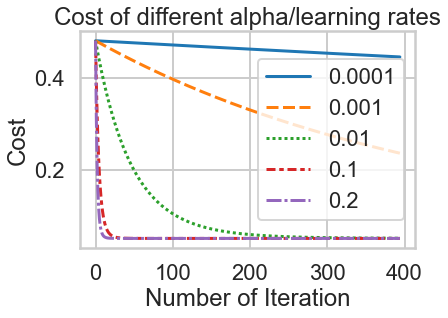

In [43]:
#plot

data_cost = pd.DataFrame(costs_list).T
data_cost.columns = alpha
plt.title("Cost of different alpha/learning rates")
plt.xlabel("Number of Iteration")
plt.ylabel("Cost")
sns.lineplot(data=data_cost)

It can be observed from the graph that the 0.2 reached the lowest cost the fastest and it was followed by 0.1 then followed by 0.01. While, 0.001 is linear and lastly, 0.0001 did not achieve the lowest cost at 395 iteration. Both 0.001 and 0.0001 did not reach lowest cost within the optimal iteration.

### 5. Is there a relationship on the learning rate and the number of iterations?



Base on the previous graph, if the learning rate is higher, then the number of iteration to get the optimal cost will decrease. Hence, the learning rate and the number of iteration has an inversely proporional relationship.

### 6. Compare the results with the results of ordinary least squares function

In [44]:
linear_regression = LinearRegression().fit(x_train,y_train)
linear_predicted_y = linear_regression.predict(x_test)
linear_predicted_y

array([ 0.44441111,  1.30168679,  1.43691235, -0.66730857,  1.55533551,
       -0.19033088,  1.34451196, -1.25613029, -0.07239572,  0.21395403,
       -0.9477649 , -1.4143734 ,  0.04187445, -0.9794427 , -0.82941714,
       -0.35860114, -1.02352749,  0.43360346, -0.72253191,  0.92669059,
        1.04134773, -0.18638735, -0.32341141,  1.3765889 , -1.1785509 ,
       -1.57241482,  1.28461088, -0.38557956, -0.92832092, -1.05226106])

In [45]:
#r2 score of the linear regression
score_r2 = linear_regression.score(x_test,y_test)
print("R2 score: ", score_r2)

R2 score:  0.9110275702091715


In [46]:
#using the weight of the optimal iteration of the gradient descent
optimal_predicted_y = predict(x_test, actual_weights[394])
optimal_predicted_y

array([ 0.45632242,  1.28440583,  1.42255522, -0.6482762 ,  1.47624351,
       -0.16993274,  1.30064552, -1.2352999 , -0.07222912,  0.21357984,
       -0.96178875, -1.37293563,  0.1208764 , -0.98922631, -0.79911416,
       -0.33197871, -0.9948767 ,  0.40902538, -0.70284619,  0.88597173,
        1.06582203, -0.09822649, -0.35109566,  1.3892682 , -1.1769486 ,
       -1.53434624,  1.2500434 , -0.39232188, -0.90517284, -1.0666816 ])

In [47]:
#calculate the r2 score
optimal_r2_score = r2_score(y_test, optimal_predicted_y)
print("R2 score is: ", optimal_r2_score)

R2 score is:  0.906288920753653
